[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Section 9.7.3

Synthetic example inspired by the 2008 financial crisis, showing that the Gaussian approximation based on the central limit theorem can completely fail if the underlying independence assumption does not hold\
Topics: Central limit theorem, independence, the Monte Carlo method

Author: Carlos Fernandez-Granda

Probability that the senior tranche loses: 0.187


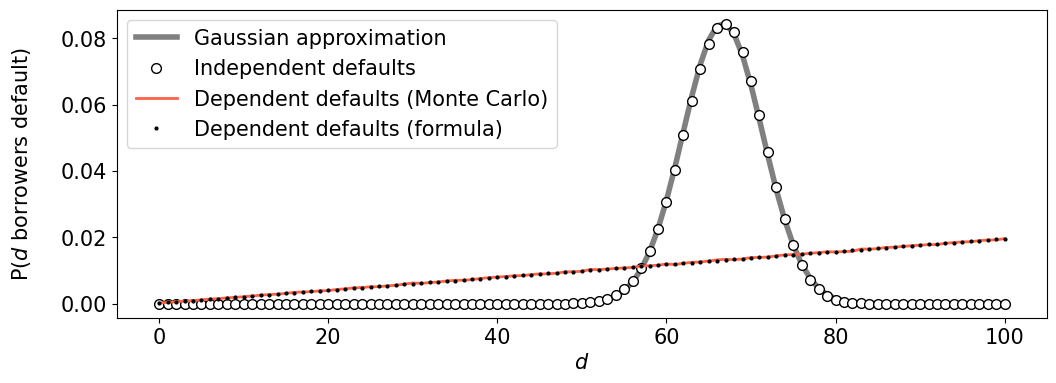

In [1]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm

font_size = 15
font_size_legend = 15
font_size_ticks = 15

p = 2./3
n = 100
inds = np.arange(0,n+1)

# Monte Carlo estimation of the probability mass function of the number of borrowers that default
rng = default_rng()

tries = int(1e6)
n_print = n/10

counts = np.zeros(n+1)
last_tranche = 0
for ind in range(tries):
    theta = rng.beta(2,1)
    d = rng.binomial(n,theta)
    counts[d] += 1
    if d > 0.9 * n:
        last_tranche += 1
pmf_mc = counts / tries
p_last_tranche = last_tranche / tries
print("Probability that the senior tranche loses:",round(p_last_tranche,3))

plt.figure(figsize=(12,4))
plt.plot(inds,norm.pdf(inds,n*p,np.sqrt(n * p * (1-p))),lw=4,color="gray",
         label='Gaussian approximation')
plt.plot(inds,binom.pmf(inds, n, p),'o',markersize=7,markerfacecolor='white',markeredgecolor="black",
        label="Independent defaults")
plt.plot(inds,pmf_mc,lw=2,color='tomato',markerfacecolor='white',markeredgecolor="black",
        label="Dependent defaults (Monte Carlo)")
plt.plot(inds,2*(inds+1)/(n+1)/(n+2),'o',markersize=2,markerfacecolor='black',markeredgecolor="black",label="Dependent defaults (formula)")

plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
# plt.ylim(0,ymax)
plt.xlabel(r"$d$",fontsize=font_size)
plt.ylabel(r'P($d$ borrowers default)',fontsize=font_size,labelpad=20)
plt.legend(fontsize=font_size_legend);